# Importing Libraries

## problem Defintion
 - Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is  automated via a network of kiosk locations throughout a city.
 - Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# About dataset
**datetime :**  hourly date + timestamp

**season :**   1 = spring, 2 = summer, 3 = fall, 4 = winter 

**holiday :**  whether the day is considered a holiday

**workingday :**  whether the day is neither a weekend nor holiday

**weather :**  1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp :**  temperature in Celsius

**atemp :**  "feels like" temperature in Celsius

**humidity :**  relative humidity

**windspeed :**  wind speed

**casual :**  number of non-registered user rentals initiated

**registered :**  number of registered user rentals initiated

In [6]:
df = pd.read_csv(r'/Users/tanayparikh/Desktop/ADM_Project/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### First viwe in the dataset

In [7]:
# Shape Of The Dataset
df.shape

(10886, 12)

In [8]:
# Some info of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
# let’s see if there are null valuecs
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
#Let's see what are the columns were given in the dataset
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [11]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Exploratory Data Analysis (EDA)

#### Data Analysis & visualisation
 ** Question**
1. Make profit feature.
 - Each registerd user rent bike for 5 USD/day
 - Casual user rent bike for 20 USD
 - Taxes 0.14%
 - Maintance 1500/year
2. Distribution count & profit.
3. Profit for each day.
4. Which season that has more registered & profit.
5. Which weather condition that has more registered & profit.
6. Correlation between profit & bikes count with all features.
7. Rentals during rush hours (7-9 am &3-5 pm).
8. Rentals during workingday & holiday.
9. registered of casual is more.
10. Schools (9-12) & (2-6) profit

In [12]:
# Make profit feature
#Each registerd user rent bike for 5 USD/day
#Casual user rent bike for 20 USD
#Taxes 0.14%
#Maintance 1500/year
def calculate_profit(x):
    
    casual_customers = x['casual']
    registered_customers =x['registered']
    casual_price_per_Day = 20
    registered_price_per_Day = 5
    Taxes_percent = 0.14
    Maintance_per_houre = 1500/(365*24)
    profit_cach = casual_customers * casual_price_per_Day + registered_price_per_Day * registered_customers
    prfit_with_Taxes = profit_cach-(profit_cach * Taxes_percent)
    totle_profit = prfit_with_Taxes - Maintance_per_houre
    return totle_profit


df['Profit'] = df[['casual','registered']].apply(calculate_profit,axis =1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767


In [13]:
#Distribution count & profit.
print ('Count describe\n',df['count'].describe())
print('-----------------------------')
print ('Profit describe\n',df['Profit'].describe())
#now let’s see max Profit & count
df[df['Profit']==df['Profit'].max()]

Count describe
 count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64
-----------------------------
Profit describe
 count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: Profit, dtype: float64


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit
9415,2012-09-15 16:00:00,3,0,0,2,27.06,31.06,36,15.0013,350,433,783,7881.728767


In [14]:
df[df['count']==df['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,5374.828767


<Axes: xlabel='Profit', ylabel='Count'>

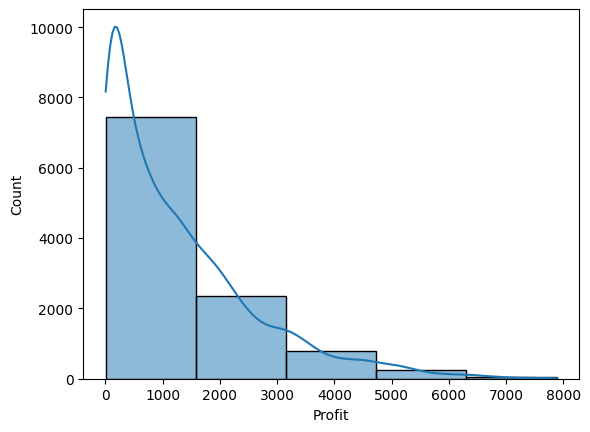

In [15]:
sns.histplot(df['Profit'],kde=True,bins=5)

<Axes: xlabel='count', ylabel='Count'>

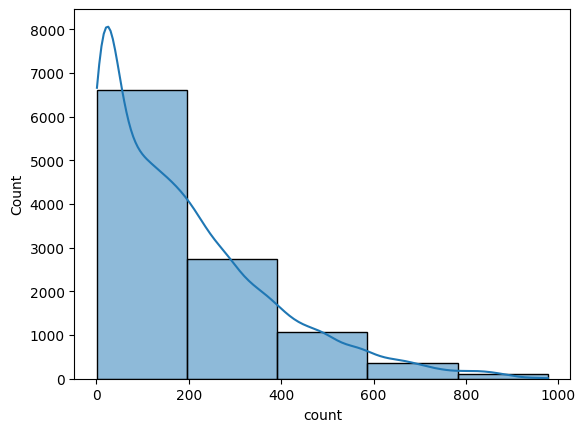

In [16]:
sns.histplot(df['count'],kde=True,bins=5)

In [17]:
df['Profit'].mean()

1288.2807513231776

    - From the two plots we can see the Average bike who rents 200 bike , and the Average of profit 1200

# Q- Profit for each day & month.

In [18]:
# convert datetime(dtype: object) to datetime(dtype: datetime64)
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
print(df['datetime'].dtypes)

datetime64[ns]


In [19]:
# create now colm for Year,Month,Day
df['Year']= df['datetime'].dt.year
df['Month_name']= df['datetime'].dt.month_name()
df['Day_of_week']= df['datetime'].dt.day_name()
df['Hour']= df['datetime'].dt.hour

In [20]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,Year,Month_name,Day_of_week,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,Wednesday,22


In [21]:
# let’s see describe of profit for Day of week
df.groupby('Day_of_week').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
Day_of_week,,,,,,,,
Friday,1529.0,1250.484751,4.128767,300.828767,1036.128767,1891.828767,5908.028767,1110.019552
Monday,1551.0,1203.496079,4.128767,249.228767,954.428767,1827.328767,5594.128767,1129.727600
Saturday,1584.0,1666.252504,4.128767,283.628767,956.578767,2614.228767,7881.728767,1772.625088
Sunday,1579.0,1513.401535,4.128767,287.928767,812.528767,2429.328767,7034.628767,1571.404307
Thursday,1553.0,1157.893803,4.128767,236.328767,911.428767,1741.328767,5533.928767,1086.029849
Tuesday,1539.0,1112.073082,4.128767,210.528767,834.028767,1704.778767,6338.028767,1065.481400
Wednesday,1551.0,1100.526188,4.128767,210.528767,791.028767,1657.478767,5447.928767,1111.243780


- Most of the days when the highest profit is made :  Saturday and Sunday
- Most of the days when the lowest profit is made :  Wednesday and Thursday
- Saturday has the highest profit and Wednesday has the lowest profit

In [22]:
df.groupby('Month_name').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
Month_name,,,,,,,,
April,909.0,1356.722386,4.128767,236.328767,868.428767,1969.228767,7344.228767,1458.515736
August,912.0,1655.357057,12.728767,461.003767,1433.878767,2385.253767,6497.128767,1377.196111
December,912.0,962.896750,4.128767,236.328767,750.178767,1440.328767,4480.428767,867.250141
February,901.0,605.952186,4.128767,137.428767,425.528767,868.428767,5099.628767,627.333003
January,884.0,494.231482,4.128767,107.328767,352.428767,671.703767,4213.828767,550.485928
July,912.0,1732.361004,4.128767,557.753767,1597.278767,2600.253767,6187.528767,1347.819769
June,912.0,1727.631947,4.128767,485.728767,1425.278767,2575.528767,6849.728767,1486.849128
March,901.0,995.696359,4.128767,150.328767,640.528767,1393.028767,7679.628767,1160.191715
May,912.0,1527.469776,4.128767,376.078767,1264.028767,2142.303767,7795.728767,1390.034599


-  The most profit month : September
- Least profit month : January

In [23]:
df.groupby('Day_of_week').describe()['count']

,count,mean,min,25%,50%,75%,max,std
Day_of_week,,,,,,,,
Friday,1529.0,197.844343,1.0,52.0,167.0,290.0,900.0,172.518208
Monday,1551.0,190.390716,1.0,39.0,146.0,277.5,968.0,180.943376
Saturday,1584.0,196.665404,1.0,45.0,141.5,309.5,783.0,180.917795
Sunday,1579.0,180.839772,1.0,43.0,119.0,298.0,757.0,167.022145
Thursday,1553.0,197.296201,1.0,44.0,155.0,280.0,901.0,187.606619
Tuesday,1539.0,189.723847,1.0,36.0,146.0,274.0,970.0,186.719673
Wednesday,1551.0,188.411348,1.0,38.0,136.0,270.5,977.0,190.942004


- Wednesday is the most popular day for renting a bike, but most of the days when the lowest profit!

In [24]:
df.groupby('Month_name').describe()['count']

,count,mean,min,25%,50%,75%,max,std
Month_name,,,,,,,,
April,909.0,184.160616,1.0,35.00,133.0,277.00,822.0,182.417619
August,912.0,234.118421,1.0,67.75,193.0,337.25,897.0,197.198461
December,912.0,175.614035,1.0,45.00,138.0,257.00,759.0,155.926050
February,901.0,110.003330,1.0,26.00,78.0,157.00,539.0,109.802322
January,884.0,90.366516,1.0,20.00,65.0,123.00,512.0,95.302518
July,912.0,235.325658,1.0,77.25,209.5,358.50,872.0,184.857337
June,912.0,242.031798,1.0,73.75,206.0,363.00,869.0,199.628690
March,901.0,148.169811,1.0,26.00,100.0,219.00,801.0,155.352814
May,912.0,219.459430,1.0,56.00,182.0,323.50,873.0,189.320173


- December is the lowest popular months for renting a bike, but most of the months when the most profit !

In [25]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,Year,Month_name,Day_of_week,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,Wednesday,22


# Q- Which season that has more registered & profit.

In [26]:
# season : 1 = spring, 2 = summer, 3 = fall, 4 = winter 
df['season'] = df['season'].apply(lambda x: str(x).replace('1', 'spring') if '1' in str(x) else x)
df['season'] = df['season'].apply(lambda x: str(x).replace('2', 'summer') if '2' in str(x) else x)
df['season'] = df['season'].apply(lambda x: str(x).replace('3', 'fall') if '3' in str(x) else x)
df['season'] = df['season'].apply(lambda x: str(x).replace('4', 'winter') if '4' in str(x) else x)

In [27]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit,Year,Month_name,Day_of_week,Hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,Saturday,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,Saturday,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,Saturday,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,Wednesday,19
10882,2012-12-19 20:00:00,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,Wednesday,20
10883,2012-12-19 21:00:00,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,Wednesday,21
10884,2012-12-19 22:00:00,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,Wednesday,22


In [28]:
df.groupby('season').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
season,,,,,,,,
fall,2733.0,1681.463893,4.128767,442.728767,1414.528767,2463.728767,7881.728767,1427.630038
spring,2686.0,699.920316,4.128767,128.828767,438.428767,920.028767,7679.628767,853.820568
summer,2733.0,1537.472894,4.128767,322.328767,1216.728767,2244.428767,7795.728767,1453.088262
winter,2734.0,1224.171196,4.128767,292.228767,937.228767,1754.228767,7864.528767,1185.870080


Text(0.5, 1.0, 'Highest profit season ')

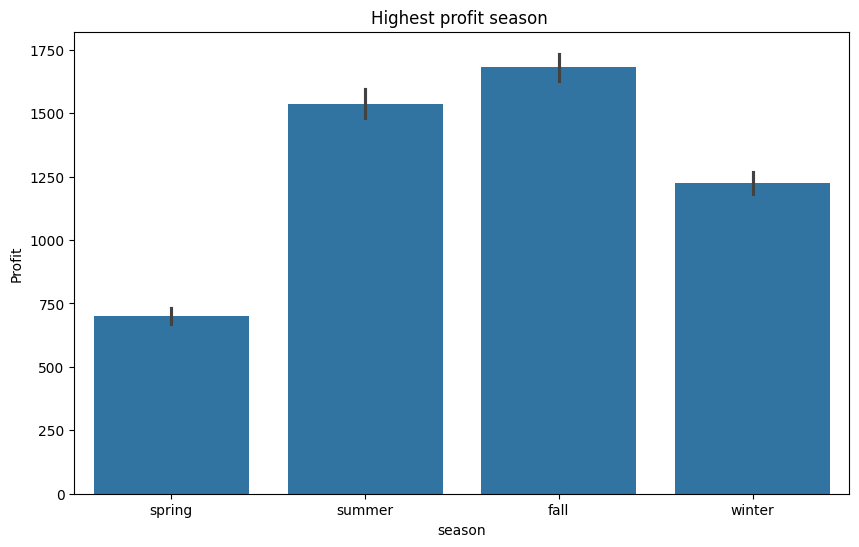

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['season'] ,y = df['Profit'])
plt.xlabel("season")
plt.ylabel("Profit")
plt.title("Highest profit season ")

- As we see from plot the season with the highest income : fall then summer 
-  the season with the lowest profit : spring

In [30]:
df.groupby('season').describe()['registered']

,count,mean,min,25%,50%,75%,max,std
season,,,,,,,,
fall,2733.0,182.196853,0.0,53.0,151.0,252.00,886.0,164.386982
spring,2686.0,100.853686,0.0,22.0,69.0,141.00,681.0,108.082025
summer,2733.0,167.804610,0.0,39.0,133.0,243.00,782.0,156.156658
winter,2734.0,170.407462,1.0,46.0,139.0,238.75,857.0,154.828357


Text(0.5, 1.0, 'Highest registered season ')

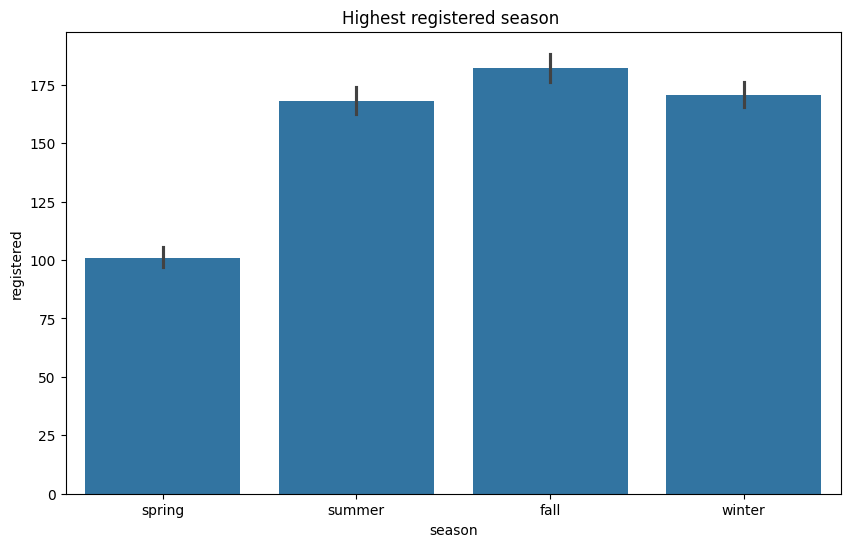

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['season'] ,y = df['registered'])
plt.xlabel("season")
plt.ylabel("registered")
plt.title("Highest registered season ")

 - As we see from plot the season with the highest registered : fall then winter
 - the season with  the lowest registered : spring 
 - We have a problem in the spring in terms of profit and registered

# Q- Which weather condition that has more profit.

In [32]:
# counvet the weather from numerical(1,2,3,4) to object Clear , Mist , Rainy ,snowy
df['weather'] = df['weather'].apply(lambda x: str(x).replace('1', 'Clear') if '1' in str(x) else x)
df['weather'] = df['weather'].apply(lambda x: str(x).replace('2', 'Mist') if '2' in str(x) else x)
df['weather'] = df['weather'].apply(lambda x: str(x).replace('3', 'Rainy') if '3' in str(x) else x)
df['weather'] = df['weather'].apply(lambda x: str(x).replace('4', 'snowy') if '4' in str(x) else x)

In [33]:
df.groupby('weather').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
weather,,,,,,,,
Clear,7192.0,1402.328892,4.128767,287.928767,1014.628767,2055.228767,7864.528767,1381.640444
Mist,2834.0,1166.470052,4.128767,244.928767,825.428767,1745.628767,7881.728767,1159.674508
Rainy,859.0,735.874634,4.128767,124.528767,399.728767,956.578767,5542.528767,925.977295
snowy,1.0,782.428767,782.428767,782.428767,782.428767,782.428767,782.428767,NaN


Text(0.5, 1.0, 'The effect of weather on profit')

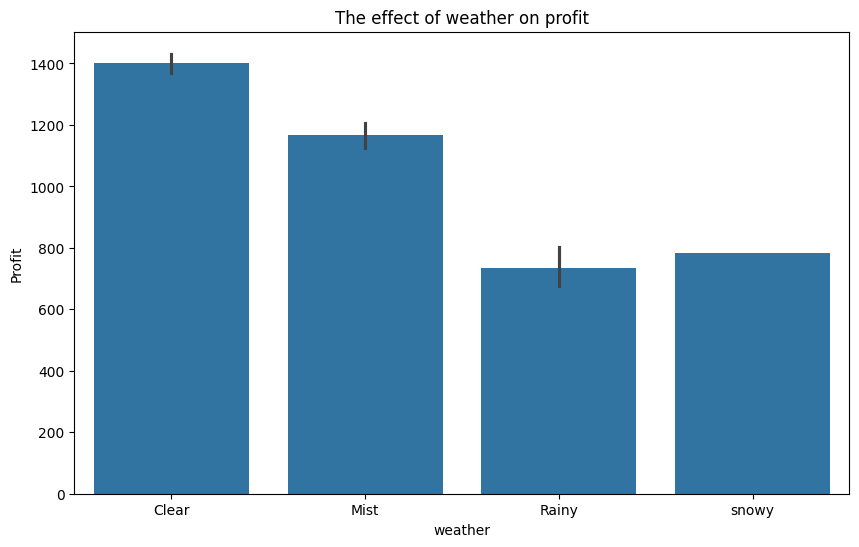

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['weather'] ,y = df['Profit'])
plt.xlabel("weather")
plt.ylabel("Profit")
plt.title("The effect of weather on profit")

- Most of the profits come from the days when the weather is clear

# Q- Correlation between profit & bikes count with all features.


In [35]:
#Correlation between profit & bikes count with all features.
plt.figure(figsize= (10,6))
sns.heatmap(df.corr()[['Profit','count']],annot=True)

ValueError: could not convert string to float: 'January'

<Figure size 1000x600 with 0 Axes>

/tmp/ipykernel_20/2194923666.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['holiday','workingday','Year','Hour'],axis=1).corr(),annot=True)


<Axes: >

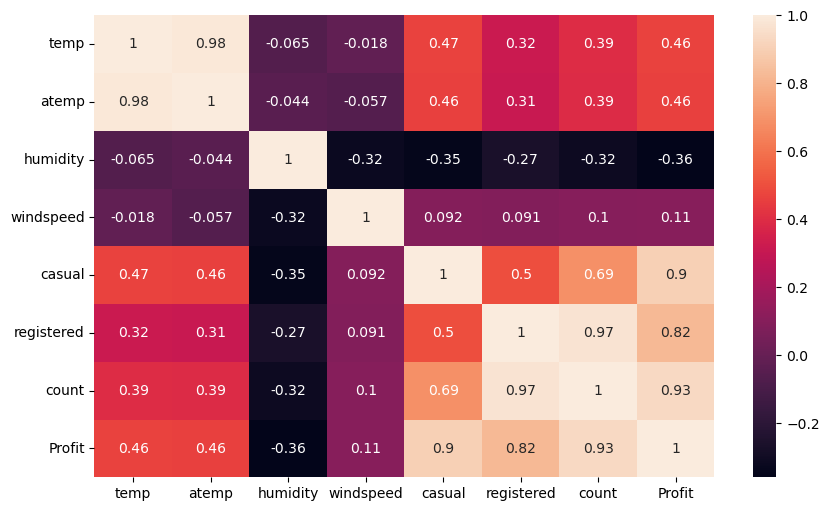

In [ ]:
#Correlation between all features.
plt.figure(figsize= (10,6))
sns.heatmap(df.drop(['holiday','workingday','Year','Hour'],axis=1).corr(),annot=True)

# Rentals & Profit during rush hours (7-9 am &3-5 pm).


In [36]:
# create new col for rush hour
def is_rush_hour (hour):
    return 1  if hour in [7,8,9,15,16,17]  else  0      

df['is_rush_hour'] =df['Hour'].apply(is_rush_hour)

In [37]:
df.groupby('is_rush_hour').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
is_rush_hour,,,,,,,,
0,8153.0,1069.674358,4.128767,158.928767,644.828767,1547.828767,7864.528767,1217.987206
1,2733.0,1940.420498,4.128767,937.228767,1689.728767,2622.828767,7881.728767,1356.260623


In [38]:
df.groupby('is_rush_hour').describe()['count']

,count,mean,min,25%,50%,75%,max,std
is_rush_hour,,,,,,,,
0,8153.0,153.140562,1.0,26.0,108.0,225.0,977.0,158.808647
1,2733.0,306.227955,1.0,157.0,276.0,420.0,970.0,194.740685


Text(0, 0.5, 'Profit')

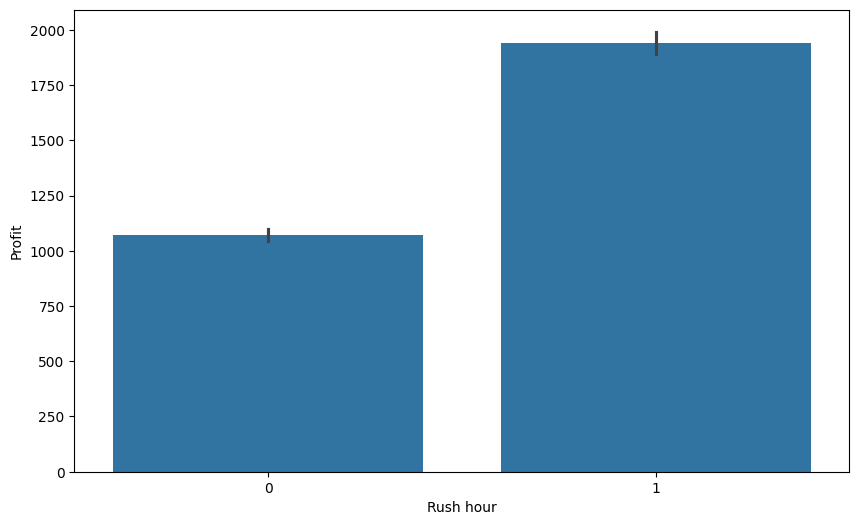

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['is_rush_hour'] ,y = df['Profit'])
plt.xlabel("Rush hour")
plt.ylabel("Profit")

- Most of the profit is not in rush hour

# Rentals during workingday.



In [40]:
df.groupby('workingday').describe()['count']

,count,mean,min,25%,50%,75%,max,std
workingday,,,,,,,,
0,3474.0,188.506621,1.0,44.0,128.0,304.0,783.0,173.724015
1,7412.0,193.011873,1.0,41.0,151.0,277.0,977.0,184.513659


In [41]:
df.groupby('workingday').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
workingday,,,,,,,,
0,3474.0,1575.484179,4.128767,283.628767,887.778767,2493.828767,7881.728767,1657.985547
1,7412.0,1153.668675,4.128767,236.328767,889.928767,1758.528767,6338.028767,1083.659550


Text(0, 0.5, 'Profit')

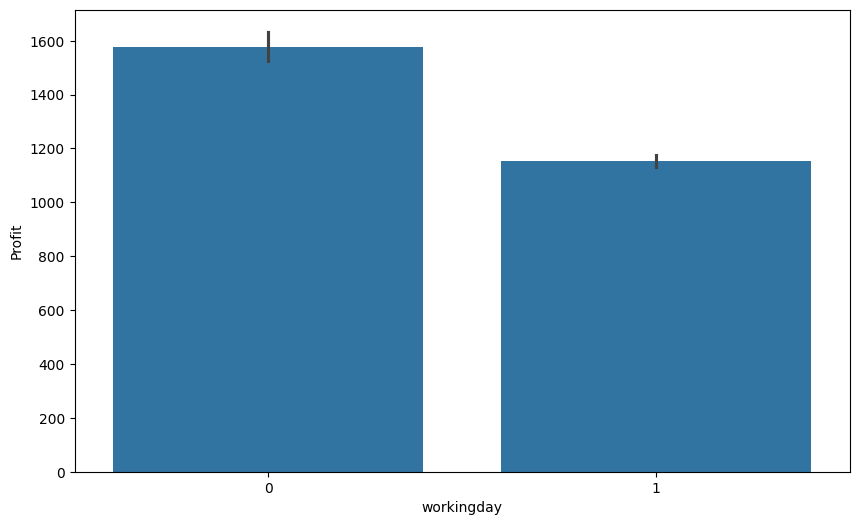

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['workingday'] ,y = df['Profit'])
plt.xlabel("workingday")
plt.ylabel("Profit")

- The workingday don't achieves the highest profit

# registered of casual is more.

- The casual achieves the highest profit

# Schools (9-12) & (2-6) profit

In [44]:
df['Month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [45]:
#create new col for school day
def check_is_school_day(month) :
    return 1 if month in ['September', 'October', 'November', 'December','January','February', 'March', 'April', 'May', 'June'] else 0

df['is_school_day']= df['Month_name'].apply(check_is_school_day)


In [46]:
df.groupby('is_school_day').describe()['Profit']

,count,mean,min,25%,50%,75%,max,std
is_school_day,,,,,,,,
0,1824.0,1693.859030,4.128767,494.328767,1502.678767,2489.528767,6497.128767,1362.757641
1,9062.0,1206.645927,4.128767,232.028767,795.328767,1741.328767,7881.728767,1283.411605


Text(0, 0.5, 'Profit')

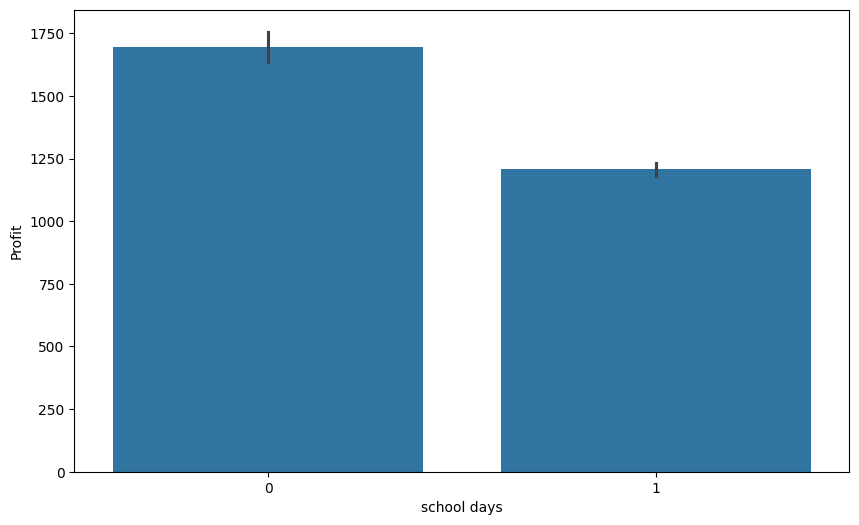

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x= df['is_school_day'] ,y = df['Profit'])
plt.xlabel("school days")
plt.ylabel("Profit")

- normal months(not school months) achieves the highest profit

# Matrix plot

In [48]:
new_df = pd.pivot_table(data = df, values= 'Profit',columns= 'Day_of_week',index='Month_name')
new_df

Day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month_name,,,,,,,
April,1154.450434,1347.061161,1564.097100,1901.682934,1298.500434,1145.928073,1017.447255
August,1620.510712,1476.018767,2177.205434,1696.931267,1571.299600,1531.130434,1557.712795
December,939.056267,946.694739,1147.241962,884.553767,913.542934,1018.283767,872.943767
February,720.246498,575.349820,663.462100,565.585910,561.281584,537.583852,589.928063
January,562.122384,391.098271,583.123767,507.168627,565.983389,471.271287,422.948767
July,1685.607934,1704.002378,2129.260434,1874.837795,1607.132934,1472.459323,1682.382934
June,1575.002378,1474.728767,2399.467656,2142.542656,1422.161267,1441.439600,1451.257934
March,819.221021,968.421987,1401.718350,1258.993724,873.243556,759.302717,865.646414
May,1654.002934,1172.976267,2287.966267,1791.423767,1477.266962,1251.994739,1189.405850


<Axes: xlabel='Day_of_week', ylabel='Month_name'>

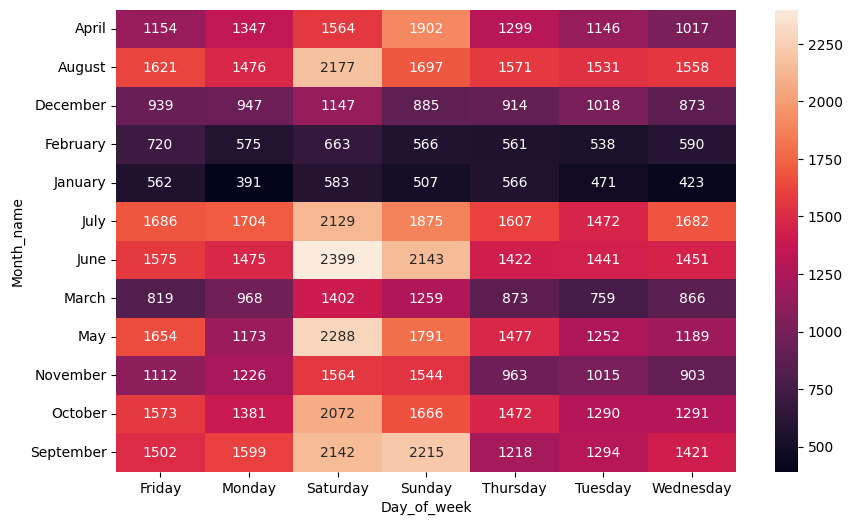

In [49]:
#correlations
plt.figure(figsize=(10,6))
sns.heatmap(new_df,fmt='.0f', annot=True,)

# Feature Engineering (Data Pre-processing)

# Data cleaning

In [50]:
df1= df.copy()

In [51]:
df1= df1[['season','holiday','workingday','weather','temp','humidity','count','Profit','Month_name','Day_of_week','Hour']]
df1

,season,holiday,workingday,weather,temp,humidity,count,Profit,Month_name,Day_of_week,Hour
0,spring,0,0,Clear,9.84,81,16,107.328767,January,Saturday,0
1,spring,0,0,Clear,9.02,80,40,275.028767,January,Saturday,1
2,spring,0,0,Clear,9.02,80,32,201.928767,January,Saturday,2
3,spring,0,0,Clear,9.84,75,13,94.428767,January,Saturday,3
4,spring,0,0,Clear,9.84,75,1,4.128767,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,winter,0,1,Clear,15.58,50,336,1534.928767,December,Wednesday,19
10882,winter,0,1,Clear,14.76,57,241,1165.128767,December,Wednesday,20
10883,winter,0,1,Clear,13.94,61,168,773.828767,December,Wednesday,21
10884,winter,0,1,Clear,13.94,61,129,709.328767,December,Wednesday,22


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  object 
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  object 
 4   temp         10886 non-null  float64
 5   humidity     10886 non-null  int64  
 6   count        10886 non-null  int64  
 7   Profit       10886 non-null  float64
 8   Month_name   10886 non-null  object 
 9   Day_of_week  10886 non-null  object 
 10  Hour         10886 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 893.1+ KB


In [53]:
df1.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'count', 'Profit', 'Month_name', 'Day_of_week', 'Hour'],
      dtype='object')

In [54]:
# make sure columns are numeric -----
# use describe to make sure values is true
for col in ['temp', 'humidity','count', 'Profit'] :
    df1[col] = pd.to_numeric(df[col],errors='coerce')

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  object 
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  object 
 4   temp         10886 non-null  float64
 5   humidity     10886 non-null  int64  
 6   count        10886 non-null  int64  
 7   Profit       10886 non-null  float64
 8   Month_name   10886 non-null  object 
 9   Day_of_week  10886 non-null  object 
 10  Hour         10886 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 893.1+ KB


In [56]:
df1.describe()

,holiday,workingday,temp,humidity,count,Profit,Hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,61.886460,191.574132,1288.280751,11.541613
std,0.166599,0.466159,7.79159,19.245033,181.144454,1309.683400,6.915838
min,0.000000,0.000000,0.82000,0.000000,1.000000,4.128767,0.000000
25%,0.000000,0.000000,13.94000,47.000000,42.000000,253.528767,6.000000
50%,0.000000,1.000000,20.50000,62.000000,145.000000,889.928767,12.000000
75%,0.000000,1.000000,26.24000,77.000000,284.000000,1891.828767,18.000000
max,1.000000,1.000000,41.00000,100.000000,977.000000,7881.728767,23.000000


# Categorical Feature cleaning

- use unique to check the Categorical Feature values

In [57]:
df1.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'count', 'Profit', 'Month_name', 'Day_of_week', 'Hour'],
      dtype='object')

In [58]:
for col in ['season', 'holiday', 'workingday', 'weather', 'Month_name', 'Day_of_week', 'Hour'] :
    
    print(f'-----{col}------')
    print(df1[col].unique())
    print('-----------------')

-----season------
['spring' 'summer' 'fall' 'winter']
-----------------
-----holiday------
[0 1]
-----------------
-----workingday------
[0 1]
-----------------
-----weather------
['Clear' 'Mist' 'Rainy' 'snowy']
-----------------
-----Month_name------
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
-----------------
-----Day_of_week------
['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
-----------------
-----Hour------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
-----------------


In [59]:
# check there are missing val or not 
df1.isnull().sum()

season         0
holiday        0
workingday     0
weather        0
temp           0
humidity       0
count          0
Profit         0
Month_name     0
Day_of_week    0
Hour           0
dtype: int64

- no missing values

# Encoding Categorical Features

In [60]:
df1= pd.get_dummies(df1,columns= ['season','weather','Day_of_week'],drop_first= True)
df1

,holiday,workingday,temp,humidity,count,Profit,Month_name,Hour,season_spring,season_summer,season_winter,weather_Mist,weather_Rainy,weather_snowy,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,0,0,9.84,81,16,107.328767,January,0,True,False,False,False,False,False,False,True,False,False,False,False
1,0,0,9.02,80,40,275.028767,January,1,True,False,False,False,False,False,False,True,False,False,False,False
2,0,0,9.02,80,32,201.928767,January,2,True,False,False,False,False,False,False,True,False,False,False,False
3,0,0,9.84,75,13,94.428767,January,3,True,False,False,False,False,False,False,True,False,False,False,False
4,0,0,9.84,75,1,4.128767,January,4,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,336,1534.928767,December,19,False,False,True,False,False,False,False,False,False,False,False,True
10882,0,1,14.76,57,241,1165.128767,December,20,False,False,True,False,False,False,False,False,False,False,False,True
10883,0,1,13.94,61,168,773.828767,December,21,False,False,True,False,False,False,False,False,False,False,False,True
10884,0,1,13.94,61,129,709.328767,December,22,False,False,True,False,False,False,False,False,False,False,False,True


In [61]:
df1['Month']= df['datetime'].dt.month
df1=df1.drop(['Month_name'],axis=1)

In [62]:
df1

,holiday,workingday,temp,humidity,count,Profit,Hour,season_spring,season_summer,season_winter,weather_Mist,weather_Rainy,weather_snowy,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Month
0,0,0,9.84,81,16,107.328767,0,True,False,False,False,False,False,False,True,False,False,False,False,1
1,0,0,9.02,80,40,275.028767,1,True,False,False,False,False,False,False,True,False,False,False,False,1
2,0,0,9.02,80,32,201.928767,2,True,False,False,False,False,False,False,True,False,False,False,False,1
3,0,0,9.84,75,13,94.428767,3,True,False,False,False,False,False,False,True,False,False,False,False,1
4,0,0,9.84,75,1,4.128767,4,True,False,False,False,False,False,False,True,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,336,1534.928767,19,False,False,True,False,False,False,False,False,False,False,False,True,12
10882,0,1,14.76,57,241,1165.128767,20,False,False,True,False,False,False,False,False,False,False,False,True,12
10883,0,1,13.94,61,168,773.828767,21,False,False,True,False,False,False,False,False,False,False,False,True,12
10884,0,1,13.94,61,129,709.328767,22,False,False,True,False,False,False,False,False,False,False,False,True,12


### check  Outliers

<Axes: ylabel='Frequency'>

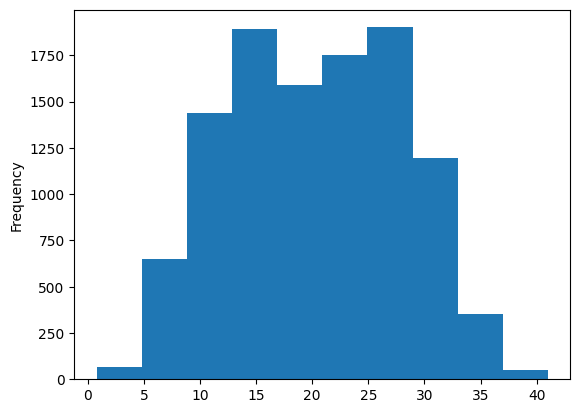

In [63]:
df['temp'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

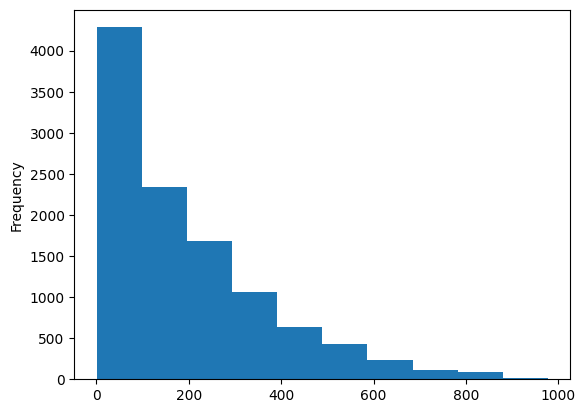

In [64]:
df['count'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

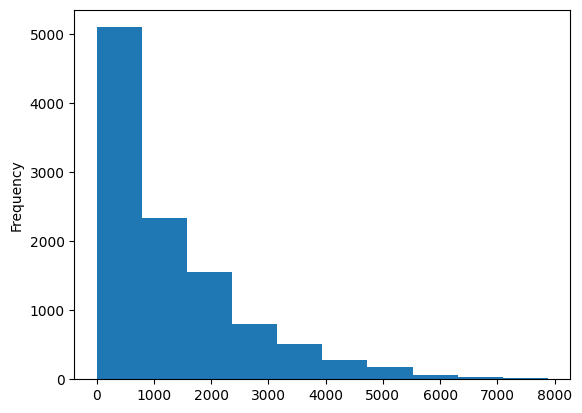

In [65]:
df['Profit'].plot.hist(bins=10)

<Axes: >

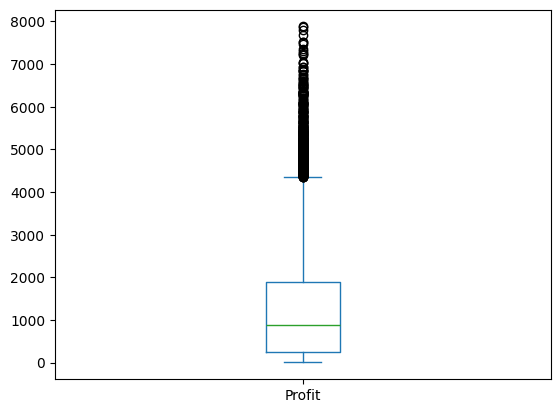

In [66]:
df['Profit'].plot.box()

- i think no outliers, that’s important values

<Axes: ylabel='Frequency'>

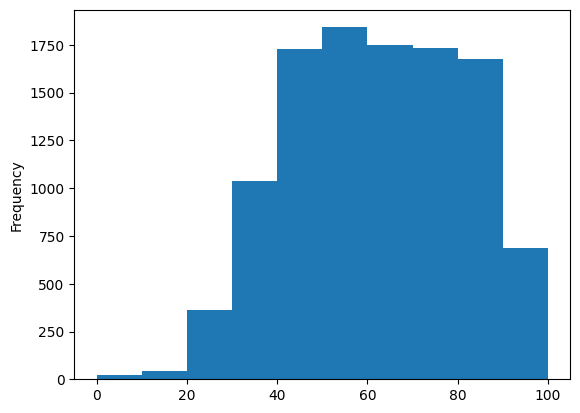

In [67]:
df['humidity'].plot.hist(bins=10)

- No Outliers

# Splitting & Preprocessing Data

In [68]:
X= df1.drop(['Profit'],axis=1)
y= df1['Profit']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Normalization

In [70]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)

# Model Training & Predicting

In [78]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([1002.54576712, 1713.98076712,  647.10776712, ..., 2095.17576712,
        859.61376712,  360.21176712])

In [79]:
y_test

10571     911.428767
5918     1612.328767
9554      515.828767
2580      928.628767
7951     2958.228767
            ...     
10063    3405.428767
3171      103.028767
4998     2081.028767
5749      812.528767
3843      386.828767
Name: Profit, Length: 2722, dtype: float64

### Model Evaluation

## Testing  & Save train model

In [81]:
import pickle

In [82]:
model_name= 'trained model.sav'
pickle.dump(model,open(model_name,'wb'))
scaler_name= 'trained Scaler.sav'
pickle.dump(sc,open(scaler_name,'wb'))

In [83]:
loaded_model= pickle.load(open('trained model.sav','rb'))
loaded_model= pickle.load(open('trained Scaler.sav','rb'))

In [84]:
X.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'count', 'Hour',
       'season_spring', 'season_summer', 'season_winter', 'weather_Mist',
       'weather_Rainy', 'weather_snowy', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Month'],
      dtype='object')

In [85]:
input_data= [1, 0, 24, 60, 126, 8, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 5]
input_data = sc.transform([input_data])
model.predict(input_data)

/Users/tanayparikh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([956.49276712])